### Outline


1.   Generate data that is not linearly separable
2.   Train with Sigmoid Neuron and see performance
3.   Write from scratch our first feed forward network
4.   Train the FF network on the data compare with SN
5.   Write a generic class on binary classification
6.   Train a generic class on binary classification
7.   Generate data for multi-class  classification
8.   Train a FF network for Point 7
9.   Use softmax as the output layer and cross-entropy loss function 
10.  Train with Point 8 for multi-class classification
11.  Exercises on other datasets



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors # for custom colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook # to show the progress bar for execution, e.g. when epochs are running

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs # to generate data that is not linearly separable and such other tasks. Popularly used in ML tasks to create data.

In [0]:
# For forward pass
# Two steps: 
# Preactivation calculated by perceptron function
# Activation computed by applying activation function, i.e. sigmoid function on perceptron's output

class SigmoidNeuron:
  def __init__(self): # initialise the parameters
    self.w=None
    self.b=None
  
  # Computing the sigmoid function - split into 2 steps -> perceptron + sigmoid (which works on top of sigmoid)
  def perceptron(self,x): #vectors
    return np.dot(x,self.w.T)+self.b

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x)) # ".0" to allow floating point numbers

  # Below two functions when loss is taken as mean squared error loss
  def grad_w_mse(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x

  def grad_b_mse(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)

  # Below two functions when we are considering cross entropy loss
  def grad_w_ce(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y==0:
      return y_pred*x
    elif y==1:
      return -1 * (1-y_pred)*x
    else:
      raise ValueError("y should be 0 or 1")

  def grad_b_ce(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y==0:
      return y_pred
    elif y==1:
      return -1 * (1-y_pred)
    else:
      raise ValueError("y should be 0 or 1")

  # Fitting parameters into model
  def fit(self, X, Y, epochs = 1, lr = 1, initialise = True, loss_fn = "mse", display_loss=False):
    # Step 1: initialise w and b
    if initialise:
      self.w = np.random.randn(1,X.shape[1]) # 1 row and as many weights as parameters (X's shape is (number of experiments,number of parameters = no. of wts))
      self.b = 0

    if display_loss:
      loss = {}
          
    for i in tqdm_notebook(range(epochs),total=epochs):
      dw = 0
      db = 0
      # Computing gradients
      for x,y in zip(X,Y): # X and Y are the actual (x,y)'s
        if loss_fn == "mse":
          dw+=self.grad_w_mse(x,y) # the actual (correct) values of x and y. We find the y_pred in the function (which we are calling) itself.
          db+=self.grad_b_mse(x,y)
        elif loss_fn == "ce":
          dw+=self.grad_w_ce(x,y)
          db+=self.grad_b_ce(x,y)

      m = X.shape[1]
      self.w -= lr*dw/m # Divide by m since m data points on which computing gradient. I.e. normalizing it so that don't have to change learning rate depending on how many points in data. /m takes care of it
      self.b -= lr*db/m

      if(display_loss):
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y,Y_pred) # Note function for finding cross entropy loss


    if display_loss:
      plt.plot(np.array(list(loss.values())))
      plt.xlabel("Epochs")
      if loss_fn == "mse":
        plt.ylabel("Mean Squared Error") # The accuracy metric for sigmoid neuron
      elif loss_fn == "ce":
        plt.ylabel("Log Loss") # The accuracy metric for sigmoid neuron
      plt.show()

  def predict(self,X):
    # model has been trained already
    Y_pred = []
    for x in X: 
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

      

Thus, class has these basic things:
1. Initialises the paramters
2. Applying forward pass outputs (preactivation, activation)
3. Gradients part
4. Fitting/training part (where gradient calculated and using that w and b updated)
5. Finally predict function

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])
# 0 maps to red and 1 maps to green

# Generate Data

In [50]:
data, labels = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state=0)
# n_samples: number of data items
# number of input features (i.e. the x1, x2, x3 that comes before the fist hiddent layer), e.g. screen size, cost, etc
# centers: clusters (blob) i.e. number of outputs (4-class classification)

print(data.shape, labels.shape)
# Data = Input : the feature values ; has 1000 rows with 2 (n_features) columns (i/p features)
# Labels + Output : For each of the inputs, belongs to one of the 4 classes (centers/labels = 0,1,2,3), thus 1000 dim

(1000, 2) (1000,)


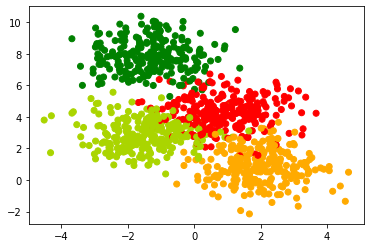

In [51]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap = my_cmap)
plt.show()
# : => first index which refers to the rows (dim 0) => all rows
# 0 => second index which refers to the columns (dim 1) => only first column
# X axis: first feature values, Y axis: second feature values

# c => color => apply color to the points to identify y-values (New way of plotting output!)
# 4 colors for 4 centers (classes)

# Remember : Red = minimum (center 0), green = maximum (center 3), yellow (center 2), light green (center 2)

### Note the data is non linearly separable

Thus scatter plot can be used to represent 3 dimensional data (2 i/ps and 1 o/p)

### We wanted to do binary classification first, but now we have 4 classes (centers), therefore reduce to 2 centers to get binary classification problem. Yet remains non-linearly separable data.

In [0]:
# Convert Class 0 and 2 to one class and the other two to another class
labels_orig = labels # Store the array of labels corresponding to each input safely for the 4 class
labels = np.mod(labels_orig,2) # labels_orig not modified

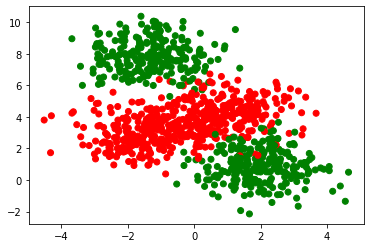

In [53]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap = my_cmap)
plt.show()
# Thus only 2 labels now (but the shape of the points are the same)

Note non linear decision boundary again

In [54]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, X_val.shape)

# X_val: val => validation set(what we previously referred to as test set)

(750, 2) (250, 2)


# Sigmoid Neuron Classification

Training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


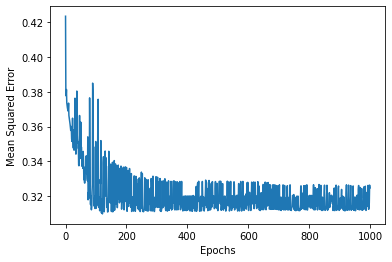

In [56]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs = 1000, lr = 1, display_loss=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


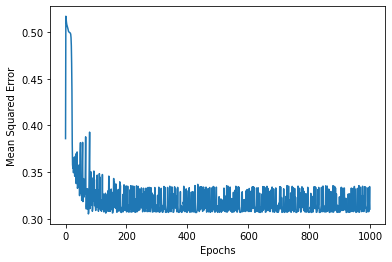

In [57]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs = 1000, lr = 0.5, display_loss=True)

Smoother curve for smaller learning rate. Hence whenever high variations in loss reduction graph, decrease learning rate

In [29]:
Y_pred_train = sn.predict(X_train) # forward pass
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype('int').ravel()

Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype('int').ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

# round to two digits
print("Training accuracy", round(accuracy_train,2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.67
Validation accuracy 0.66


For a baseline of 0.5 ( i.e. random classifier => when randomly guesses, then accuracy will be 0.5 expectation - randomly red or green), our model is giving 0.7 accuracy. So fairly good, still not yet.

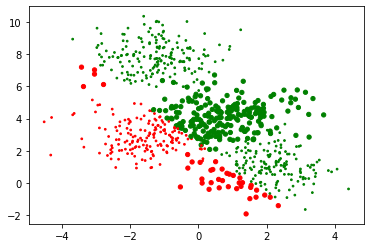

In [31]:
# Plot our predicted value along with the points
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap = my_cmap, s = 15*(np.abs(Y_pred_binarised_train-Y_train)+.2))

# If predicted correctly Y_pred_binarised - Y_train = 0 => s = 1.5*.2 = 3
# If predicted wrongly Y_pred_binarised - Y_train = 1 (since absolute valule of even a small decimal is 1) => s = 1.5*1.2 = 18

#### Colour represents "predicted" values.   
Size represents difference between predicted and real value.  
Hence, small points (size = 3) represents values correctly predicted, while the large points (size = 18) represents those wrongly predicted

#### Hence 4D plot (2 input features, one output feature - predicted value, and finally one more feature representing the correctness of the prediction.

### Hence, as expected it is just impossible for a sigmoid neuron to classify non linearly separated data points.   

### Therefore have to move to feed forward neural networks.

# First Feedforward Neural Network

A simple neural network. Two inputs, two neurons in one hidden layer, and one neuron in output layer.

Thus 2 x's, 6 weights, 3 biases => 9 parameters with 2 inputs

In [0]:
class FirstFFNetwork:

  # First initialise
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0

  # Next, sigmoid
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))

  def forward_pass(self,x):
    self.x1, self.x2 = x; # Splitting the two input columns to the two corresponding two variables
    # Hence x1 contains all the values for the first feature and x2 all the second feature values
    self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3

  # Then, grad
  def grad(self, x, y):
    # given certain values of x and y, computes the changes to be made to the parameters using gradient
    self.forward_pass(x)

    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * (1-self.h3)

    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1 * (1-self.h1) * 

  # Then, fit
  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = True):

    #initialise w,b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0

    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9 # Broadcasting to 9 zeroes and assigning each zero to one variable

      for x,y in zip(X,Y):
        self.grad(x,y)
        # Difference between self.dw1 and dw1: self.dw1 is the grad for one input, while dw1 is the cumulative gradient
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3

      m = X.shape[1] # number of rows

      # Subtract the cumulative sums
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m

      if(display_loss):
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y, Y_pred)


    if display_loss:
      print(loss.values())
      plt.plot(np.array(list(loss.values())))
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error") # The accuracy metric for sigmoid neuron
      plt.show()



  # Finally, predict
  def predict(self, X):
    Y_pred = []
    for x in X: 
      y_pred = self.forward_pass(x) # Predict output on each "pair" of inputs (of the two features)
      Y_pred.append(y_pred)
    return np.array(Y_pred)


# Same structure for any  class

In [39]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs = 1000, learning_rate = 0.01, display_loss=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


AttributeError: ignored

In [0]:
Y_pred_train = ffn.predict(X_train) # forward pass
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype('int').ravel()

Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype('int').ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

# round to two digits
print("Training accuracy", round(accuracy_train,2))
print("Validation accuracy", round(accuracy_val, 2))

In [0]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap = my_cmap, s = 15*(np.abs(Y_pred_binarised_train-Y_train)+.2))

### This time all are tiny dots => almost all predicted correctly.  
### Those that are wrongly predicted, are fine since there is some confustion at the interface, almost impossible to get a hard core decision boundary

# Generic Class of Feed Forward Neuron

In [0]:
class FFSNNetwork:
  # Using vectors throughout to simplify computations

  def __init__(self, n_inputs, hidden_sizes = [2]): # hidden_sizes, comma separated values of number of neurons in each hidden layer

    self.nx = n_inputs # number of inputs
    self.ny = 1 # one output since binary classification
    self.nh = len(hidden_sizes) # number of hidden layers (length of the list)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] # Getting the number of neurons in each layer from input layer through hidden layers to output layer

    self.W = {}
    self.B = {}

    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1]) # number of weights for layer i+1 = number of inputs that layer * number of neurons in that layer (since each neuron connected to each input)
      # rows = number of inputs, columns = number of neurons
      self.B[i+1] = np.random.randn(1, self.sizes[i]) # Only one different bias term to each neuron in layer i+1 ( a vector of size = number of neurons )

      # Next, sigmoid
    def sigmoid(self,x):
      return 1.0/(1.0+np.exp(-x))

    def forward_pass(self,x):
      self.A = {}
      self.H = {}

      self.H[0] = x.reshape(1, -1) # Just assigning H0 = input values. Flatteing to 1 row and as many columns as possible
      for i in range(self.nh+1): # Looping through all layers
        # Matrix mul = Hamadard / element wise ( and not dot prod )
        self.A[i+1] = np.matmul(self.H[i],self.W[i+1]+self.B[i+1]) # H from previous layer with W and B of current layer
        self.H[i+1] = self.sigmoid(self.A[i+1]) # H of current layer
      return self.H[self.nh+1]  # output layer's predicted value


    def grad(self,X):
      pass

    def fit(self, X, Y, epochs = 1, learning_rate = 1, display_loss = True, initialise = True):
      #initialise w,b
      if initialise:
        for i in range(self.nh+1):
          self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1]) 
          self.B[i+1] = np.random.randn(1, self.sizes[i])

      if display_loss:
        loss = {}

      for e in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
          dW[i+1] = np.zeros(self.sizes[i],self.sizes[i+1])
          dB[i+1] = np.zeros(1, self.sizes[i+1])

        for x,y in zip(X,Y):
          self.grad(x,y)
          # Difference between self.dw1 and dw1: self.dw1 is the grad for one input, while dw1 is the cumulative gradient
          for i in range(self.nh+1):
            dW[i+1] += self.dW[i+1]
            dB[i+1] += self.dB[i+1]

        m = X.shape[1] # number of rows

        # Subtract the cumulative sums
        for i in range(self.nh+1):
            self.W[i+1] -= learning_rate*dW[i+1]/m
            self.B[i+1] -= learning_rate*dB[i+1]/m

        if(display_loss):
          Y_pred = self.sigmoid(self.perceptron(X))
          loss[e] = mean_squared_error(Y, Y_pred)


      if display_loss:
        plt.plot(np.array(list(loss.values())))
        plt.xlabel("Epochs")
        plt.ylabel("Mean Squared Error") # The accuracy metric for sigmoid neuron
        plt.show()



    # Finally, predict
    def predict(self, X):
      Y_pred = []
      for x in X: 
        y_pred = self.forward_pass(x) # Predict output on each "pair" of inputs (of the two features)
        Y_pred.append(y_pred)
      return np.array(Y_pred)


In [42]:
ffsnn = FFSNNetwork(2, [2,3])
ffsnn.fit(X_train, Y_train, epochs = 1000, learning_rate = 0.001, display_loss = True)

AttributeError: ignored

In [0]:
Y_pred_train = ffsnn.predict(X_train) # forward pass
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype('int').ravel()

Y_pred_val = ffsnn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype('int').ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

# round to two digits
print("Training accuracy", round(accuracy_train,2))
print("Validation accuracy", round(accuracy_val, 2))

In [0]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap = my_cmap, s = 15*(np.abs(Y_pred_binarised_train-Y_train)+.2))

# Generic class for Multi Class Classification

In [44]:
# No more binary classification, hence train-test split again
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify = labels_orig, random_state = 0)
print(X_train.shape, X_val.shape, labels_orig.shape)

(750, 2) (250, 2) (1000,)


In [45]:
enc = OneHotEncoder()
# label 0 -> (1,0,0,0), label 1 -> (0,1,0,0)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


In [0]:
class FFSN_MultiClass:
  # Using vectors throughout to simplify computations

  def __init__(self, n_inputs, n_outputs, hidden_sizes = [3]): # hidden_sizes, comma separated values of number of neurons in each hidden layer

    self.nx = n_inputs # number of inputs
    self.ny = n_outputs # one output since binary classification
    self.nh = len(hidden_sizes) # number of hidden layers (length of the list)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] # Getting the number of neurons in each layer from input layer through hidden layers to output layer

    self.W = {}
    self.B = {}

    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1]) # number of weights for layer i+1 = number of inputs that layer * number of neurons in that layer (since each neuron connected to each input)
      # rows = number of inputs, columns = number of neurons
      self.B[i+1] = np.random.randn(1, self.sizes[i]) # Only one different bias term to each neuron in layer i+1 ( a vector of size = number of neurons )

      # Next, sigmoid
    def sigmoid(self,x):
      return 1.0/(1.0+np.exp(-x))

    def forward_pass(self,x):
      self.A = {}
      self.H = {}

      self.H[0] = x.reshape(1, -1) # Just assigning H0 = input values. Flatteing to 1 row and as many columns as possible
      for i in range(self.nh+1): # Looping through all layers
        # Matrix mul = Hamadard / element wise ( and not dot prod )
        self.A[i+1] = np.matmul(self.H[i],self.W[i+1]+self.B[i+1]) # H from previous layer with W and B of current layer
        self.H[i+1] = self.sigmoid(self.A[i+1]) # H of current layer
      return self.H[self.nh+1]  # output layer's predicted value


    def grad(self,X):
      pass

    def fit(self, X, Y, epochs = 1, learning_rate = 1, display_loss = True, initialise = True):
      #initialise w,b
      if initialise:
        for i in range(self.nh+1):
          self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1]) 
          self.B[i+1] = np.random.randn(1, self.sizes[i])

      if display_loss:
        loss = {}

      for e in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
          dW[i+1] = np.zeros(self.sizes[i],self.sizes[i+1])
          dB[i+1] = np.zeros(1, self.sizes[i+1])

        for x,y in zip(X,Y):
          self.grad(x,y)
          # Difference between self.dw1 and dw1: self.dw1 is the grad for one input, while dw1 is the cumulative gradient
          for i in range(self.nh+1):
            dW[i+1] += self.dW[i+1]
            dB[i+1] += self.dB[i+1]

        m = X.shape[1] # number of rows

        # Subtract the cumulative sums
        for i in range(self.nh+1):
            self.W[i+1] -= learning_rate*dW[i+1]/m
            self.B[i+1] -= learning_rate*dB[i+1]/m

        if(display_loss):
          Y_pred = self.sigmoid(self.perceptron(X))
          loss[e] = mean_squared_error(Y, Y_pred)


      if display_loss:
        plt.plot(np.array(list(loss.values())))
        plt.xlabel("Epochs")
        plt.ylabel("Mean Squared Error") # The accuracy metric for sigmoid neuron
        plt.show()



    # Finally, predict
    def predict(self, X):
      Y_pred = []
      for x in X: 
        y_pred = self.forward_pass(x) # Predict output on each "pair" of inputs (of the two features)
        Y_pred.append(y_pred)
      return np.array(Y_pred)


Note 4 columns now

In [46]:
ffsn_multi = FFSN_MultiClass(2,4,[2,3])
ffsn_multi.fit(X_train, Y_train, epochs = 2000, display_loss = True, learning_rate = 0.005)

NameError: ignored

In [0]:
Y_pred_train = ffsn_multi.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_val = ffsn_multi.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train,2))
print("Validation accuracy", round(accuracy_val, 2))

In [0]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap = my_cmap, s = 15*(np.abs(Y_pred_binarised_train-Y_train)+.2))